In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd

In [2]:
import sklearn

In [3]:
cols = ['x1','x2','x3','x4']

X = [['a','p','n','u'],
     ['a','p','n','u'],
     ['a','p','n','u'],
     ['a','p','n','u'],
     ['a','p','n','w'],
     ['b','p','n','w'],
     ['b','p','m','w'],
     ['b','p','m','w'],
     ['b','p','m','w'],
     ['b','p','m','w'],
     ['c','q','m','w'],
     ['c','q','m','w'],
     ['c','q','m','u'],
     ['c','q','m','u'],
     ['c','q','m','u'],]

In [4]:
df = pd.DataFrame(data = X,columns = cols)

### Train Trees

In [5]:
clfs = []
xs = []
ys = []
for col in cols:
    
    this_y = df.loc[:,col]
    this_X = df.drop(col,axis = 1)
    this_X = pd.get_dummies(this_X)
    
    xs.append(this_X)
    ys.append(this_y)
    
    this_clf = tree.DecisionTreeClassifier()
    this_clf.fit(this_X,this_y)
    clfs.append(this_clf)

[Text(167.4, 163.07999999999998, 'x1_c <= 0.5\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

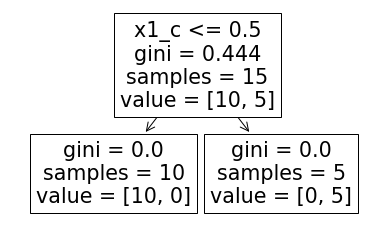

In [6]:
tree.plot_tree(clfs[1],feature_names=['x1_a','x1_b','x1_c','x3_m','x3_n','x4_u','x4_w'])

### Get initial weights

In [11]:
from sklearn.metrics import recall_score, roc_auc_score

Initial weights for layer 1

In [21]:
recall_pc = []
for i,clf in enumerate(clfs):
    recall_pc.append(recall_score(ys[i],clf.predict(xs[i]),average=None))

#in__weights_l1 = [f for g in recall_pc for f in g]

In [32]:
recall_pc

[array([1. , 0.8, 1. ]),
 array([1., 1.]),
 array([1.        , 0.83333333]),
 array([1.   , 0.625])]

### Evaluate on Dataset

Generate *x'*

In [36]:
dt_y_hat = []

for i, clf in enumerate(clfs):
    dt_y_hat.append(clf.predict_proba(xs[i]))

In [46]:
hl1 = []
for i, x_prime in enumerate(dt_y_hat):
    
    hl1.append(np.argmax(x_prime*recall_pc[i],axis = 1))
hl1 = np.array(hl1).T

In [48]:
hl1

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [2, 1, 0, 0],
       [2, 1, 0, 0],
       [2, 1, 0, 0],
       [2, 1, 0, 0],
       [2, 1, 0, 0]])

In [50]:
X

[['a', 'p', 'n', 'u'],
 ['a', 'p', 'n', 'u'],
 ['a', 'p', 'n', 'u'],
 ['a', 'p', 'n', 'u'],
 ['a', 'p', 'n', 'w'],
 ['b', 'p', 'n', 'w'],
 ['b', 'p', 'm', 'w'],
 ['b', 'p', 'm', 'w'],
 ['b', 'p', 'm', 'w'],
 ['b', 'p', 'm', 'w'],
 ['c', 'q', 'm', 'w'],
 ['c', 'q', 'm', 'w'],
 ['c', 'q', 'm', 'u'],
 ['c', 'q', 'm', 'u'],
 ['c', 'q', 'm', 'u']]

In [34]:
x_prime = clfs[0].predict_proba(xs[0])
for i in range(1,4):
    
    x_prime = np.concatenate((x_prime,clfs[i].predict_proba(xs[i])),axis = 1)

In [35]:
dt_y_hat

[]

In [30]:
x_prime

array([[1. , 0. , 0. , 1. , 0. , 0. , 1. , 0.8, 0.2],
       [1. , 0. , 0. , 1. , 0. , 0. , 1. , 0.8, 0.2],
       [1. , 0. , 0. , 1. , 0. , 0. , 1. , 0.8, 0.2],
       [1. , 0. , 0. , 1. , 0. , 0. , 1. , 0.8, 0.2],
       [0.5, 0.5, 0. , 1. , 0. , 0. , 1. , 0.8, 0.2],
       [0.5, 0.5, 0. , 1. , 0. , 0.8, 0.2, 0. , 1. ],
       [0. , 1. , 0. , 1. , 0. , 0.8, 0.2, 0. , 1. ],
       [0. , 1. , 0. , 1. , 0. , 0.8, 0.2, 0. , 1. ],
       [0. , 1. , 0. , 1. , 0. , 0.8, 0.2, 0. , 1. ],
       [0. , 1. , 0. , 1. , 0. , 0.8, 0.2, 0. , 1. ],
       [0. , 0. , 1. , 0. , 1. , 1. , 0. , 0.6, 0.4],
       [0. , 0. , 1. , 0. , 1. , 1. , 0. , 0.6, 0.4],
       [0. , 0. , 1. , 0. , 1. , 1. , 0. , 0.6, 0.4],
       [0. , 0. , 1. , 0. , 1. , 1. , 0. , 0.6, 0.4],
       [0. , 0. , 1. , 0. , 1. , 1. , 0. , 0.6, 0.4]])

Multiply x' by weights and get argmax

In [28]:
np.argmax(x_prime*in__weights_l1,axis = 1)

array([0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2])

# 